# Group Number #1

1. Bassel El Mohor **r0767219**
2. Mohamad Al-Homsi **r0714957**
3. Ayesha Riaz **r0974212**
4. Hassan Kamran **r0974307**
5. Qais Iwaidat **r0732116**




# Assignment 1

## Data Exploration and Feature Selection



The experiment began with initial data exploration where we checked the distribution of target variable, the distribution of this target variable across different features in the data set. By doing this we aim to do dimensionality reduction in order to increase predictive power. We also aim at removing features that represent information already presented in another variable.

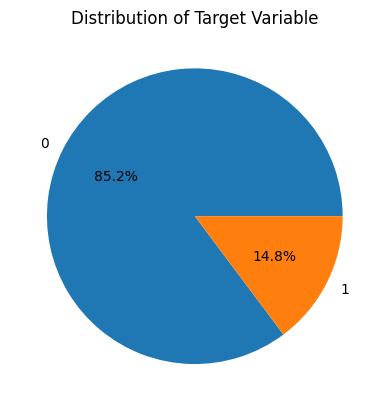

In [ ]:
# Load the dataset
df = pd.read_csv('train.csv')

df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Target Variable')
plt.ylabel('')
plt.show()


The data set is highly imbalanced

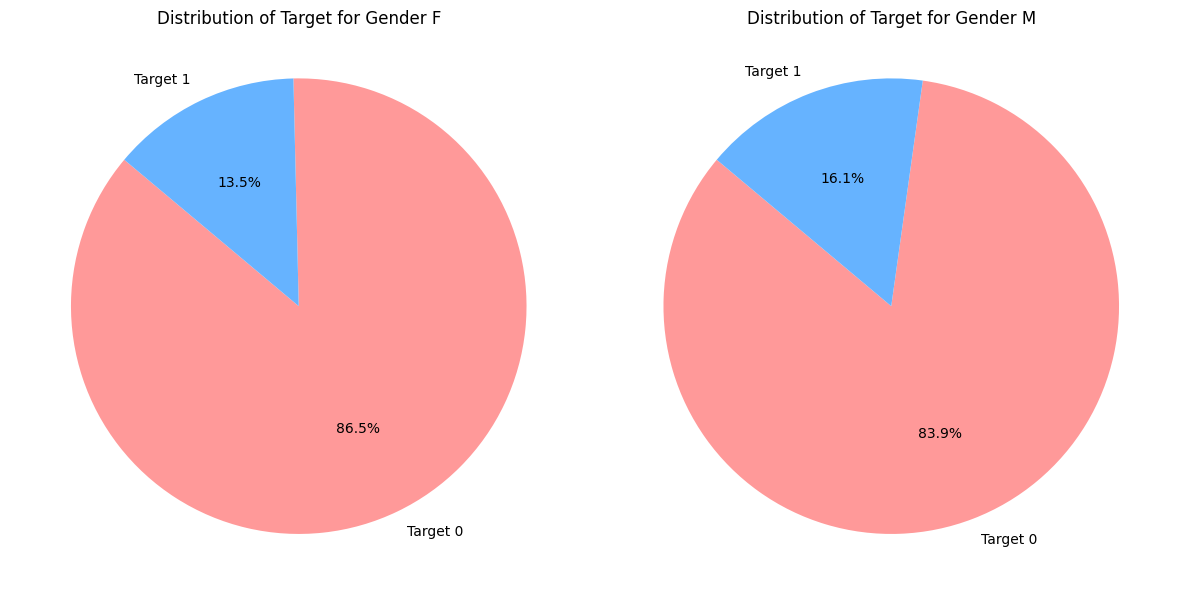

In [ ]:
# Create the pivot table
pivot_table = pd.pivot_table(df, index='Gender', columns='target', aggfunc='size', fill_value=0)

# Creating the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting pie charts for each gender
for ax, gender in zip(axes, pivot_table.index):
    counts = pivot_table.loc[gender]
    labels = [f'Target {int(t)}' for t in counts.index]
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    ax.set_title(f'Distribution of Target for Gender {gender}')
    ax.axis('equal')

# Adjust layout
plt.tight_layout()
plt.show()

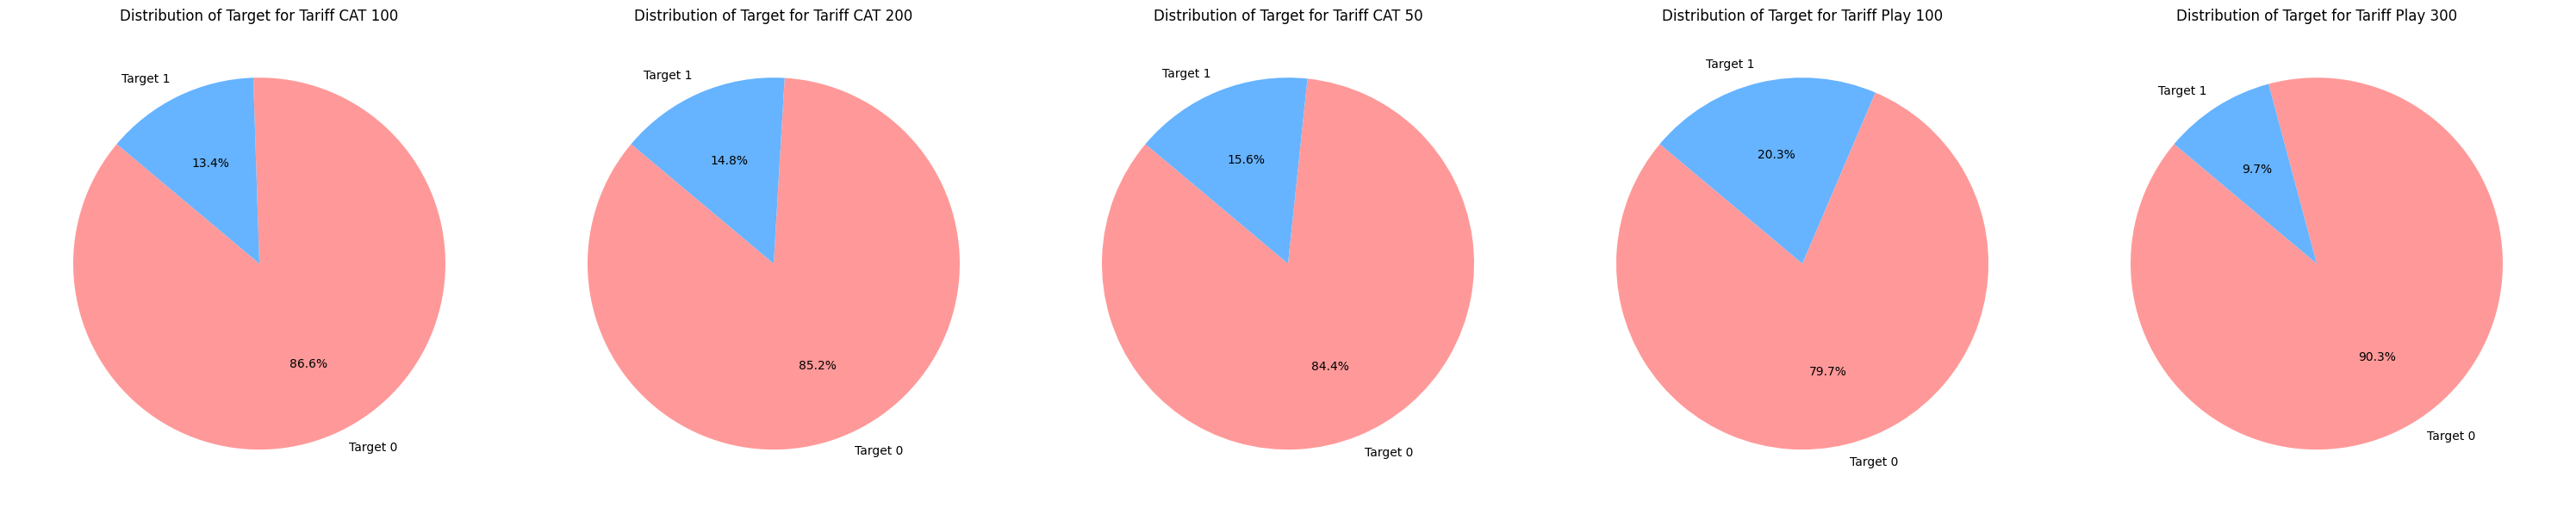

In [ ]:
# Create the pivot table
pivot_table = pd.pivot_table(df, index='tariff', columns='target', aggfunc='size', fill_value=0)

# Creating subplots dynamically based on the number of unique tariff values
num_tariffs = pivot_table.shape[0]
fig, axes = plt.subplots(1, num_tariffs, figsize=(num_tariffs * 6, 6))

# Plotting pie charts for each tariff
for ax, tariff in zip(axes, pivot_table.index):
    counts = pivot_table.loc[tariff]
    labels = [f'Target {int(t)}' for t in counts.index]
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    ax.set_title(f'Distribution of Target for Tariff {tariff}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout
plt.tight_layout()
plt.show()

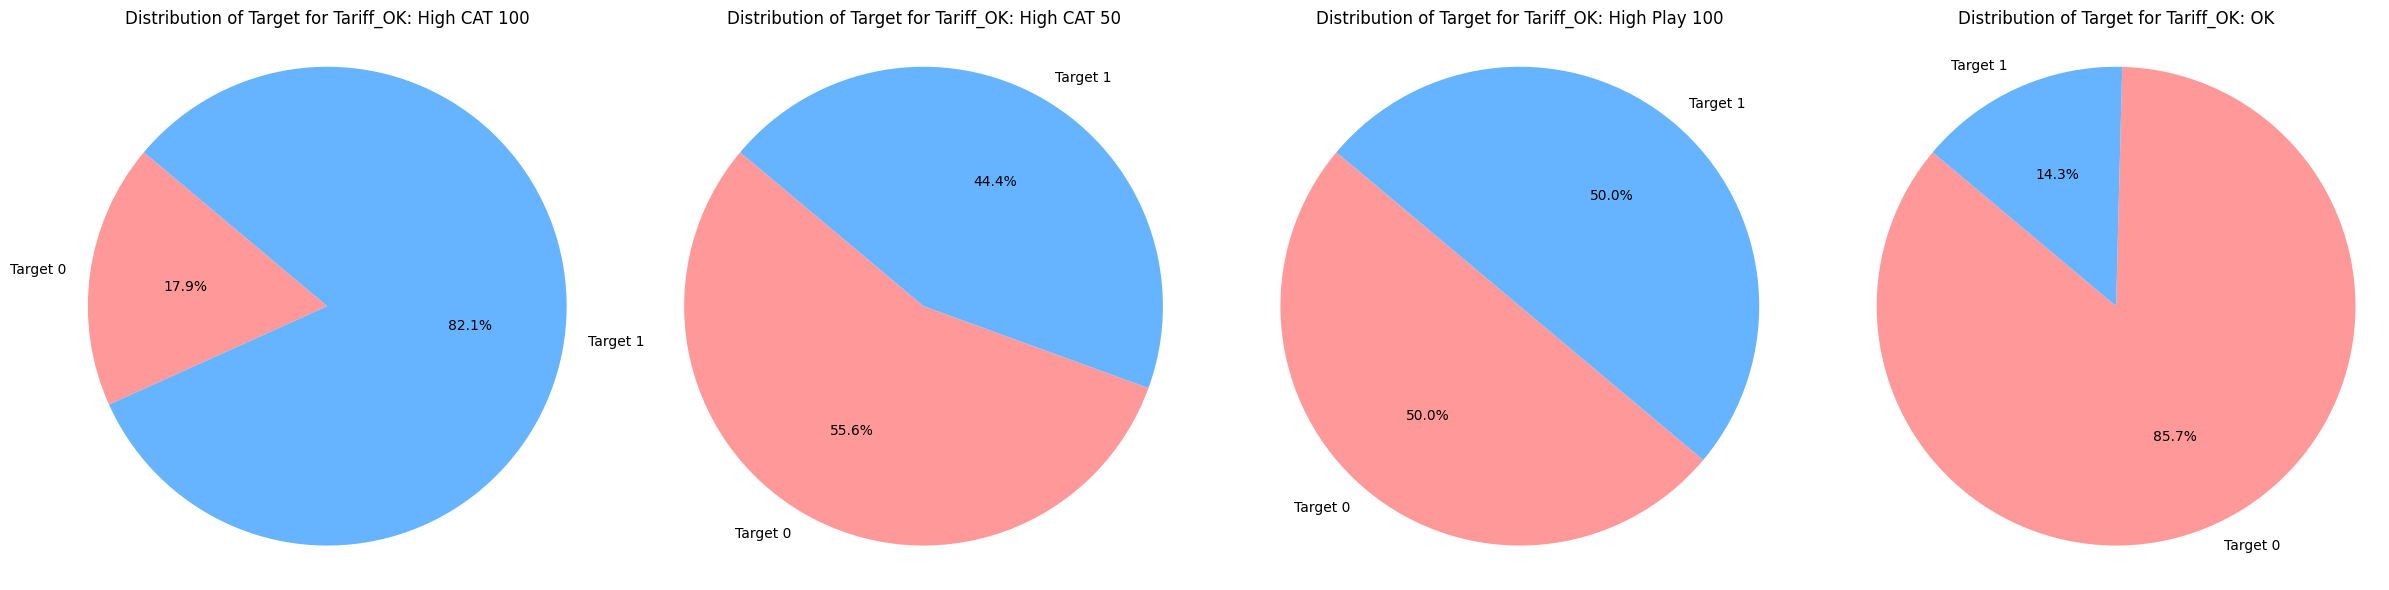

In [ ]:
# Create the pivot table
pivot_table = pd.pivot_table(df, index='Tariff_OK', columns='target', aggfunc='size', fill_value=0)

# Creating subplots dynamically based on the number of unique Tariff_OK values
num_categories = pivot_table.shape[0]
fig, axes = plt.subplots(1, num_categories, figsize=(num_categories * 6, 6))

# Plotting pie charts for each category of Tariff_OK
for ax, category in zip(axes, pivot_table.index):
    counts = pivot_table.loc[category]
    labels = [f'Target {int(t)}' for t in counts.index]
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    ax.set_title(f'Distribution of Target for Tariff_OK: {category}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout
plt.tight_layout()
plt.show()


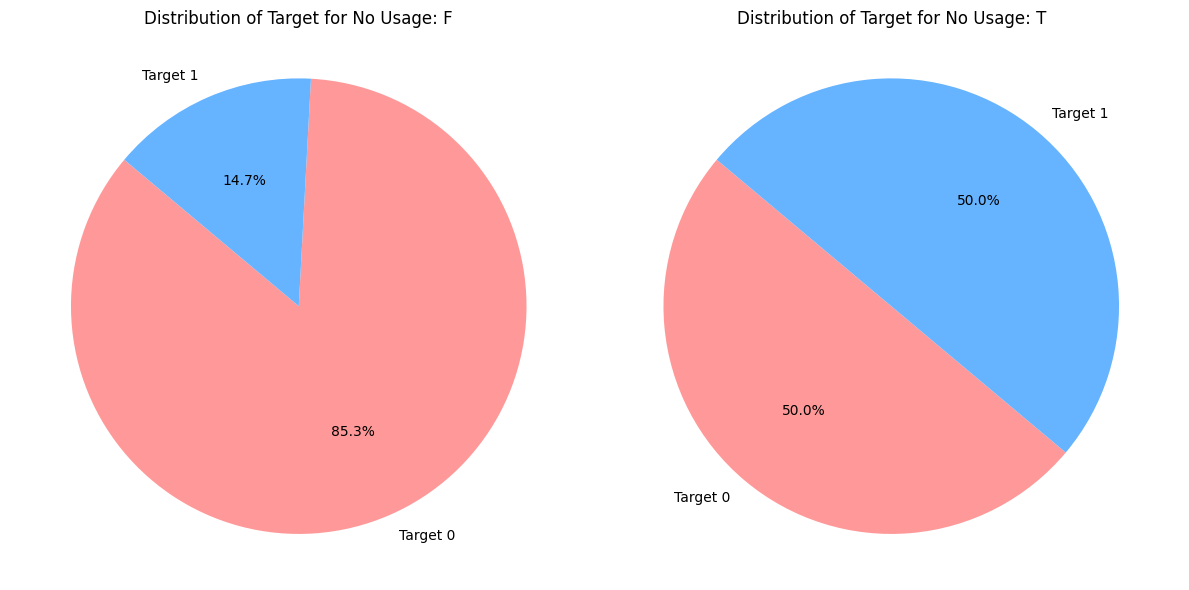

In [ ]:
# Create the pivot table
pivot_table = pd.pivot_table(df, index='No Usage', columns='target', aggfunc='size', fill_value=0)

# Creating subplots dynamically based on the number of unique No Usage values
num_categories = pivot_table.shape[0]
fig, axes = plt.subplots(1, num_categories, figsize=(num_categories * 6, 6))

# Plotting pie charts for each category of No Usage
for ax, category in zip(axes, pivot_table.index):
    counts = pivot_table.loc[category]
    labels = [f'Target {int(t)}' for t in counts.index]
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    ax.set_title(f'Distribution of Target for No Usage: {category}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout
plt.tight_layout()
plt.show()


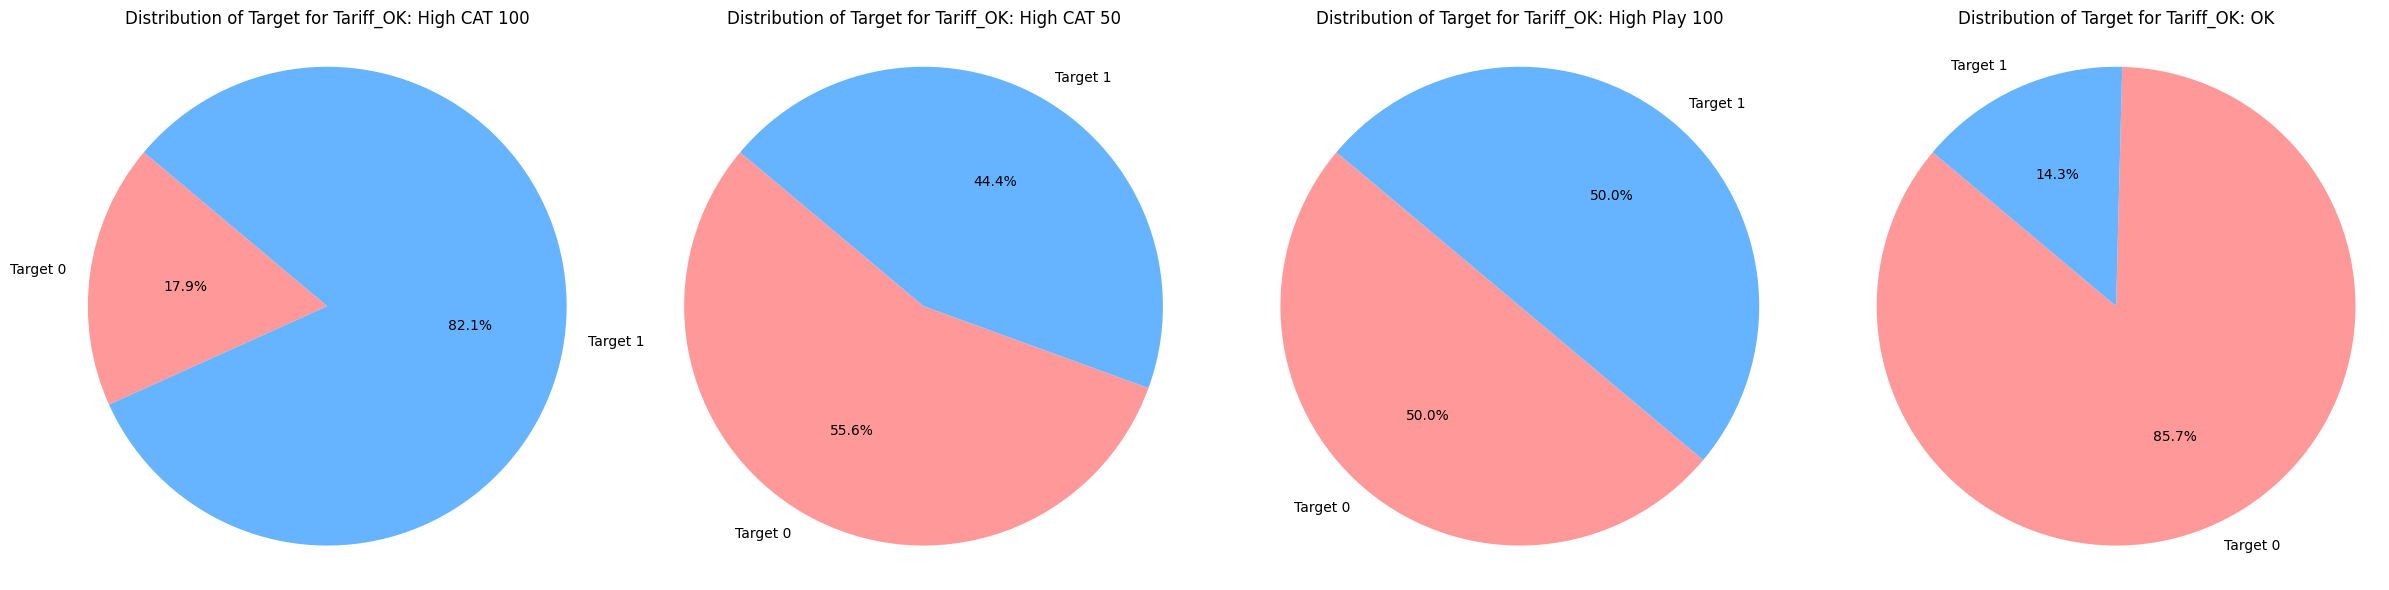

In [ ]:
# Create the pivot table
pivot_table = pd.pivot_table(df, index='Tariff_OK', columns='target', aggfunc='size', fill_value=0)

# Creating subplots dynamically based on the number of unique Tariff_OK values
num_categories = pivot_table.shape[0]
fig, axes = plt.subplots(1, num_categories, figsize=(num_categories * 6, 6))

# Plotting pie charts for each category of Tariff_OK
for ax, category in zip(axes, pivot_table.index):
    counts = pivot_table.loc[category]
    labels = [f'Target {int(t)}' for t in counts.index]
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    ax.set_title(f'Distribution of Target for Tariff_OK: {category}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout
plt.tight_layout()
plt.show()


The percentage of churners and non churners in Males and Females are the same, hence including this variable wont contribute to increasing predictive power, so we will remove it. Connection Date is better respresented in L_O_S hence we will remove it as well. Moreover, **peak_calls_sum, OffPeak_calls_Sum, Weekend_calls_sum** are reflected in more detail in the columns mentioning the mins for these calls. The column ID has no meaning when training, so we will remove these and convert the remaining categorical variable to nominal using dummy variables.


## Preprocessing and fitting Random Forest



In [ ]:

import pandas as pd
from datetime import datetime

# Load the dataset
df = pd.read_csv('train.csv')
#Perform one-hot encoding
df = pd.get_dummies(df, columns=['tariff'])
df = pd.get_dummies(df, columns=['Usage_Band'])
df = pd.get_dummies(df, columns=['Handset'])

#Removing columns
df.drop('Connect_Date', axis=1, inplace=True)
df.drop('Gender', axis=1, inplace=True)
df.drop('high Dropped calls', axis=1, inplace=True)
df.drop('Peak_calls_Sum', axis=1, inplace=True)
df.drop('OffPeak_calls_Sum', axis=1, inplace=True)
df.drop('Weekend_calls_Sum', axis=1, inplace=True)
df.drop('No Usage', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
df.drop('Tariff_OK', axis=1, inplace = True)
print(df)

#Removing the missing values
df_cleaned = df.dropna()
print(df_cleaned)


#Fitting a Random Forest algorithm on the data
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score , f1_score
from imblearn.over_sampling import SMOTE

# Split the data into features and target
X = df_cleaned.drop('target', axis=1)
y = df_cleaned['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

#Performing SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Define a custom scoring function for AUC
def custom_auc(y_true, y_pred):
    return roc_auc_score(y_true, y_pred[:, 1])

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100,random_state=42, bootstrap=True)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with custom scoring function for AUC
grid_search = GridSearchCV(rf_model, param_grid, scoring=custom_auc, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_resampled, y_resampled)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Predict probabilities on the test set
y_probs = best_rf_model.predict_proba(X_test)

# Calculate AUC on the test set
auc = roc_auc_score(y_test, y_probs[:, 1])
print("AUC on test set:", auc)

predictions = pd.DataFrame({'target_probability': y_probs[:, 1], 'average_cost_min': X_test['average cost min']})

# Sort the predictions based on the highest probability of churn predicted
top_20_predictions = predictions.sort_values(by='target_probability', ascending=False).head(20)

# Print top 20 predictions
print(top_20_predictions)


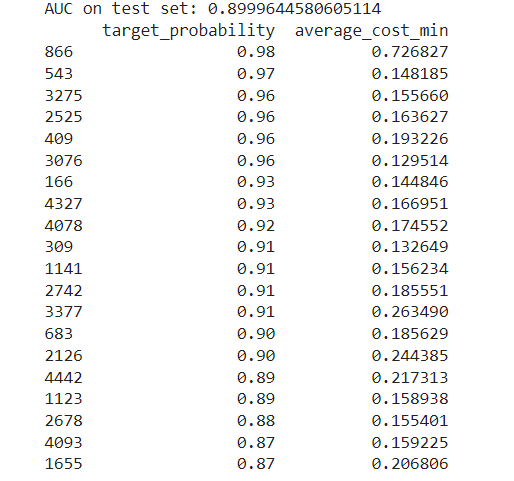

In [ ]:
print(top_20_predictions)
# Calculate the sum of 'average_cost_min' for the top 20 predictions
total_average_cost_min = top_20_predictions['average_cost_min'].sum()

# Print the sum
print("Sum of average_cost_min for top 20 predictions:", total_average_cost_min)

      target_probability  average_cost_min
3377                0.98          0.263490
3275                0.94          0.155660
866                 0.94          0.726827
1631                0.91          0.185262
543                 0.91          0.148185
4327                0.91          0.166951
4338                0.90          0.148001
409                 0.90          0.193226
4078                0.90          0.174552
1758                0.89          0.184247
4554                0.88          0.348823
3076                0.88          0.129514
586                 0.87          0.169780
2685                0.87          0.137304
2126                0.87          0.244385
2742                0.87          0.185551
2997                0.86          0.140684
4093                0.86          0.159225
2507                0.86          0.163320
4182                0.86          0.149697
Sum of average_cost_min for top 20 predictions: 4.174684


## Importing, Processing, and Cleaning Test Data


In [ ]:
import pandas as pd

# Load the dataset
df_t = pd.read_csv('test.csv')

#Perform one-hot encoding
df_t = pd.get_dummies(df_t, columns=['tariff'])
df_t = pd.get_dummies(df_t, columns=['Usage_Band'])
df_t = pd.get_dummies(df_t, columns=['Handset'])

#Removing the columns
df_t.drop('high Dropped calls', axis=1, inplace=True)
df_t.drop('Connect_Date', axis=1, inplace=True)
df_t.drop('Peak_calls_Sum', axis=1, inplace=True)
df_t.drop('OffPeak_calls_Sum', axis=1, inplace=True)
df_t.drop('Weekend_calls_Sum', axis=1, inplace=True)
df_t.drop('No Usage', axis=1, inplace=True)
df_t.drop('Gender', axis=1, inplace=True)
df_t.drop('Tariff_OK', axis=1, inplace=True)

#Storing the id column and removing
id = df_t['id']
df_t.drop('id', axis=1, inplace=True)

print(df_t)

df_t_cleaned = df_t
print(df_t_cleaned)

df_t_cleaned.to_csv('testt_cleaned.csv', index=False)




In [ ]:
df_imputed = df_t_cleaned.fillna(df.median())

## Predicting on Test Set


In [ ]:
import pandas as pd

# Use the trained Random Forest model to make predictions on the test dataset
predictions = best_rf_model.predict(df_imputed)

# You can then use the predictions for further analysis or evaluation
print(predictions)

# Create a DataFrame to show predictions along with other characteristics
predictions_df = pd.DataFrame({'target': predictions})

# Concatenate the original characteristics of the test_cleaned dataset with the predictions
resultt_df = pd.concat([df_t_cleaned, predictions_df], axis=1)

# Concatenate the 'id' column from test_cleaned with the predictions
resultt_df['id'] = id

# Display the DataFrame
print(resultt_df)

final_df = resultt_df.loc[:, ['id', 'target']]
final_df.rename(columns={'id': 'ID', 'target': 'PRED'}, inplace=True)
final_df.dropna(inplace=True)

print(final_df)

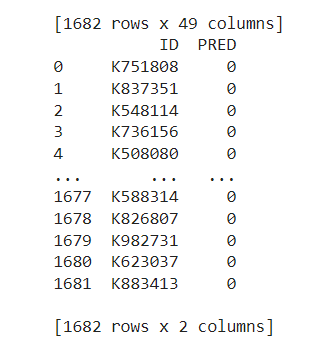

## Reflection

Our model performed better on the hidden part than the one used for the public leaderboard. This could be attributed to the the data in the hidden part being more similar to the data used for training the model in terms of feature distribution as well as target distribution. The results show that the AUC for our model increased on the hidden part while profit decreased, this further strenghtens the fact that the data in the hidden part was more representative of the training data.  

## Intrepretability of Model


When using blackbox models such as Random Forest that cannot be intuitively deciphered in their ouput, using interpretability techniques on the processed models is advised to have some understanding and trust in the model's predictions. There are several techniques that are mainstays of within machine learning techniques, including: Feature importance, Partial dependence plots, individual conditional expectiations plots, LIME, Shapley values (or SHAP).

A simple, most straighforward in application is the permutation importance, which does not require the model's retraining and is model 'agnostic'. With this techniques, the features are randomely shuffled, or in other words permuted, to examine the effect on the model's performance. Becuase the features are shuffled, meaning their values are permuted, then the trained model does not change, which is helpful in terms of efficiency. Model agnosticism means that this technique can be applied to any type of model regardless of its type or internal structure. Below, we calculated the permutation importance scores for the features:

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Calculate permutation importance
permutation_result = permutation_importance(best_rf_model, X_test, y_test, n_repeats=10, random_state=42, scoring='roc_auc')

# Extract importance scores
importances = pd.Series(permutation_result.importances_mean, index=X_test.columns).sort_values(ascending=False)

# Print the importance scores
print("Permutation Importance:")
print(importances)




Permutation Importance:
Handset_CAS30             0.093849
Handset_ASAD90            0.059122
Dropped_Calls             0.011209
Age                       0.009400
Handset_S50               0.008392
Total_call_cost           0.007432
Handset_ASAD170           0.006192
AveOffPeak                0.006127
Total_Cost                0.005429
L_O_S                     0.005030
Nat_call_cost_Sum         0.002892
International_mins_Sum    0.002715
AveWeekend                0.002707
Handset_WC95              0.002648
Handset_BS110             0.002565
Handset_S80               0.002363
AveNational               0.002183
Nat-InterNat Ratio        0.001733
Peak_mins_Sum             0.001616
Usage_Band_Med            0.001600
Mins_charge               0.001374
Weekend_mins_Sum          0.001364
actual call cost          0.001282
OffPeak_mins_Sum          0.001200
Handset_BS210             0.001037
Peak ratio                0.000737
tariff_CAT 100            0.000644
tariff_CAT 50             0.000

## Reflection on Evaluatation metrics used



The most glaring repercussion of relying on the profit of retaining the top 20 predicted churners is that it evaluates the model on a very limited subsection of the clients, as opposed to AUC for example which takes into account the overall performance. While AUC is a good accuracy metric, it does not take into account real concerns that businesses face. In a business context, it makes more sense to rely on the top 20 churners due to budget constraints and the inability of companies to reach out to all predicted churners. Nevertheless this metric is not robust and will vary widely based on the value of K chosen for a case. Moreover, this focus on the K top predicted churners might come at the expense of broader generalization.

This misalignment also showed up When using these metrics to optimise our models, we often found that the two metrics went in opposite directions; in some instances AUC improved, while the @top20 metric worsened, and vice versa.

Alternatively, another metric that could be used for this case could be precision @ top k churners. This will ensure that a high percentage of true positives are predicted amongst the top k predicted churners. Moreover, visualization techniques such as Profit curves and Lift curves could be employed to better understand the models performance.

# Assignment 2

## Overview:

For this assignment, we developed a sentiment analysis model for game screenshots using deep learning techniques. The goal was to classify game screenshots into three sentiment categories: Positive, Negative, and Neutral. We implemented a pipeline consisting of data preprocessing, model training, and evaluation.

### Data Preprocessing:

We began by preprocessing the dataset, which consisted of game screenshots along with their associated sentiment labels. To ensure data quality, we removed observations with null values in the sentiment column. Next, we aggregated the sentiment categories into three classes: Positive, Negative, and Neutral, based on a mapping dictionary. Visualizing the distribution of aggregated sentiment classes helped us understand the dataset's class balance.

Sampling was performed to balance the class distribution, ensuring each sentiment class had a proportional representation in the training data. This step involved selecting a subset of samples for each class based on desired proportions. The resulting sampled dataset was used for model training.

### Model Training and Evaluation:

We employed a convolutional neural network (CNN) architecture, leveraging transfer learning with the pre-trained ResNet-50 model. This architecture has shown effectiveness in various computer vision tasks. To prevent overfitting, we applied data augmentation techniques tailored to each sentiment class, such as random flips, color jitter, and random rotation. Class weighting and early stopping were also utilized to mitigate overfitting and improve model generalization.

During training, we monitored the training and validation loss, as well as accuracy, across multiple epochs. Visualizing confusion matrices provided insights into the model's performance on both the training and validation sets. Early stopping was implemented to prevent overfitting, ensuring the model's optimal generalization performance.

## Preprocessing

###  Importing Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile
import os

# Path to the zip file containing images
zip_path = '/content/drive/MyDrive/AA/images-small.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/images_small')# Here you need to uplaod the images zip file in the directory and add the path

# Check the extracted files
print(os.listdir('/content/images_small')) # Here add the path as well.


In [ ]:
import json

# Path to the dataset.json file
dataset_json_path = '/content/dataset.json'

# Load the metadata from dataset.json
with open(dataset_json_path, 'r') as f:
    data = json.load(f)

# Replace .jpg with .webp in screenshot filenames
for game in data:
    game['screenshots'] = [screenshot.replace('.jpg', '.webp') for screenshot in game['screenshots']]

# Print out a few samples to verify the changes
print(data[:5])

### Dropping Missing values

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Remove observations with null values in the 'sentiment' column
df = df.dropna(subset=['sentiment'])

### Aggregating Classes into 3 Classes

In [ ]:
import matplotlib.pyplot as plt

# Define mapping dictionary for aggregating sentiment categories
sentiment_mapping = {
    'Positive': 'Positive',
    'Very Positive': 'Positive',
    'Mixed': 'Neutral',
    'Mostly Positive': 'Positive',
    'Overwhelmingly Positive': 'Positive',
    'Mostly Negative': 'Negative',
    'Negative': 'Negative',
    'Very Negative': 'Negative',
    'Overwhelmingly Negative': 'Negative'
}

# Map sentiment categories to aggregated classes
df['sentiment_aggregated'] = df['sentiment'].map(sentiment_mapping)

# Plot the distribution of aggregated sentiment classes
plt.figure(figsize=(8, 6))
df['sentiment_aggregated'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Aggregated Sentiment Classes')
plt.xlabel('Sentiment Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


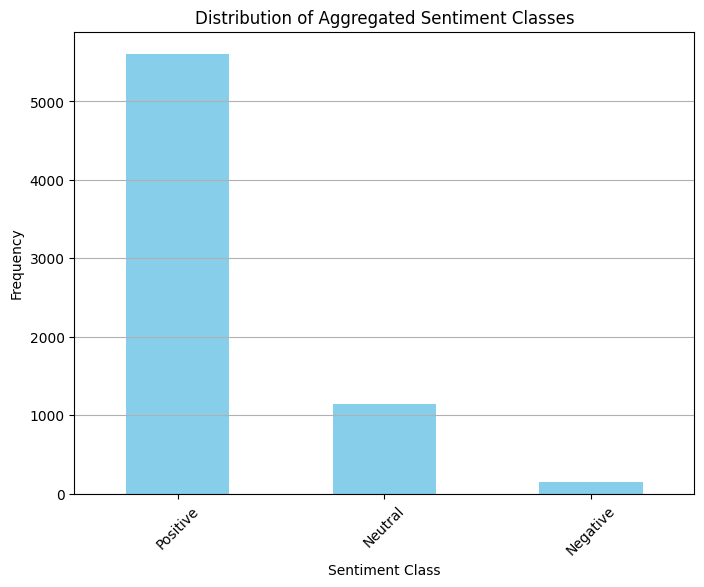

### Creating a sample with the same distribution of each class

In [ ]:
from sklearn.model_selection import train_test_split

# Define the desired proportions for each class in the sample
proportions = {
    'Positive': 5608 / (5608 + 1144 + 152),  # Proportion of positive class
    'Neutral': 1144 / (5608 + 1144 + 152),    # Proportion of neutral class
    'Negative': 152 / (5608 + 1144 + 152)     # Proportion of negative class
}

# Calculate the number of samples for each class based on the desired proportions
num_samples_per_class = {sentiment_class: int(proportion * 500) for sentiment_class, proportion in proportions.items()}

# Initialize an empty DataFrame to store the sampled data
sampled_df = pd.DataFrame()

# Iterate over each class
for sentiment_class, num_samples in num_samples_per_class.items():
    # Filter the original DataFrame for the current class
    class_df = df[df['sentiment_aggregated'] == sentiment_class]

    # Take a random sample from the current class, ensuring it doesn't exceed the target number of samples
    sampled_class_df = class_df.sample(min(len(class_df), num_samples), random_state=42)

    # Append the sampled data to the DataFrame storing the sampled data
    sampled_df = pd.concat([sampled_df, sampled_class_df], ignore_index=True)


### Creating a dataframe with image path and corresponding label

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

# Assume 'sampled_df' contains the sampled data and 'images_folder' is the folder containing the images
images_folder = '/content/images_small/images'

# Create a new DataFrame to store individual images, their labels, and their game IDs
image_data = []
for index, row in sampled_df.iterrows():
    game_id = row['appid']  # Assuming 'game_id' is the column name for the game IDs in sampled_df
    sentiment_label = row['sentiment_aggregated']
    for image_filename in row['screenshots']:
        image_path = os.path.join(images_folder, image_filename)
        image_data.append({'appid': game_id, 'image_path': image_path, 'label': sentiment_label})

image_df = pd.DataFrame(image_data)

# Check the first few rows of the resulting DataFrame
image_df.head()

### Splitting the dataset

In [ ]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(image_df, test_size=0.2, stratify=image_df['label'], random_state=42)

# Print the distribution of labels in the training and testing sets
print("Training set label distribution:")
print(train_df['label'].value_counts())
print("\nTesting set label distribution:")
print(test_df['label'].value_counts())

### Mapping each sentiment into a label

In [ ]:
label_mapping = {'Positive': 2, 'Negative': 0, 'Neutral': 1}
train_df['label'] = train_df['label'].map(label_mapping)
test_df['label'] = test_df['label'].map(label_mapping)

train_df.head()

## Fine-Tuning Resnet50 model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models
from PIL import Image
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Define transformations for data augmentation
positive_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

# For negative class data augmentation
negative_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(degrees=30),
    transforms.RandomResizedCrop(size=64, scale=(0.8, 1.0)),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor()
])

# For neutral class data augmentation
neutral_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(degrees=30),
    transforms.RandomResizedCrop(size=64, scale=(0.8, 1.0)),
    transforms.RandomVerticalFlip(),  # Add random vertical flip
    transforms.ToTensor()
])

# Define the dataset class
class CustomDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.df.iloc[idx, 1]
        image = Image.open(img_name).convert("RGB")
        label = int(self.df.iloc[idx, 2])

        if self.transform:
            if label == 2:  # Positive class
                image = self.transform['positive'](image)
            elif label == 0:  # Negative class
                image = self.transform['negative'](image)
            elif label == 1:  # Neutral class
                image = self.transform['neutral'](image)

        return image, label

# Create datasets and dataloaders
positive_samples = 1500
negative_samples = len(train_df[train_df['label'] == 0])
neutral_samples = len(train_df[train_df['label'] == 1])


# For the positive class, select a subset of 1500 samples randomly
positive_df = train_df[train_df['label'] == 2].sample(positive_samples, replace=True)
neutral_df = train_df[train_df['label'] == 1]
negative_df = train_df[train_df['label'] == 0]

# Concatenate the selected samples for each class
augmented_train_df = pd.concat([positive_df, negative_df, neutral_df])

# Apply transformations based on class label
transform = {
    'positive': positive_transform,
    'negative': negative_transform,
    'neutral': neutral_transform
}

# Create the custom dataset
dataset = CustomDataset(augmented_train_df, transform=transform)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Test dataset
# Assuming test_df is the test DataFrame
test_dataset = CustomDataset(test_df, transform=positive_transform)  # Use positive_transform for test
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Calculate class weights
class_counts = augmented_train_df['label'].value_counts().sort_index()
class_weights = 1.0 / class_counts
weights = class_weights.values

# Convert weights to a tensor and move to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
weights = torch.tensor(weights, dtype=torch.float32).to(device)

# Load pre-trained ResNet model
resnet = models.resnet50(pretrained=True)
num_features = resnet.fc.in_features

# Modify the final fully connected layer
resnet.fc = nn.Linear(num_features, 3)
resnet = resnet.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.Adam(resnet.parameters(), lr=0.001)

# Early stopping parameters
patience = 3
best_val_loss = float('inf')
best_epoch = 0
best_model_path = 'best_model.pth'
patience_counter = 0

# Train the model
for epoch in range(11):  # Number of epochs
    running_loss = 0.0
    correct = 0
    total = 0
    all_train_preds = []
    all_train_labels = []

    # Initialize tqdm progress bar for training
    train_pbar = tqdm(train_loader, desc=f'Training Epoch {epoch+1}', leave=True)

    for inputs, labels in train_pbar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_train_preds.extend(predicted.tolist())
        all_train_labels.extend(labels.tolist())

        # Update training progress bar description
        train_pbar.set_postfix({'loss': running_loss / len(train_loader), 'accuracy': correct / total})

    # Generate training confusion matrix
    train_cm = confusion_matrix(all_train_labels, all_train_preds)

    # Plot training confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(train_cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Training Confusion Matrix - Epoch {epoch+1}')
    plt.show()

    # Validation loop
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    val_preds = []
    val_labels_list = []

    # Initialize tqdm progress bar for validation
    val_pbar = tqdm(val_loader, desc=f'Validation Epoch {epoch+1}', leave=True)

    # Disable gradient calculation
    resnet.eval()
    with torch.no_grad():
        for val_inputs, val_labels in val_pbar:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = resnet(val_inputs)
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()
            val_preds.extend(val_predicted.tolist())
            val_labels_list.extend(val_labels.tolist())

            # Update validation progress bar description
            val_pbar.set_postfix({'loss': val_running_loss / len(val_loader), 'accuracy': val_correct / val_total})

    # Generate validation confusion matrix
    val_cm = confusion_matrix(val_labels_list, val_preds)

    # Plot validation confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(val_cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Validation Confusion Matrix - Epoch {epoch+1}')
    plt.show()

    # Calculate validation accuracy and loss
    val_accuracy = val_correct / val_total
    val_loss = val_running_loss / len(val_loader)

    print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

    # Save the best model if validation loss improves
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch + 1
        torch.save(resnet.state_dict(), best_model_path)
        patience_counter = 0  # Reset patience counter
    else:
        patience_counter += 1

    # Early stopping
    if patience_counter >= patience:
        print(f'Early stopping at epoch {epoch + 1}')
        break

    resnet.train()

print(f'Best Validation Loss: {best_val_loss} at Epoch {best_epoch}')


Best Validation Loss: 0.7544222197362355 at Epoch 2

### Testing the model on test set

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.df.iloc[idx, 1]
        image = Image.open(img_name).convert("RGB")
        label = int(self.df.iloc[idx, 2])

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations for test data
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# Create the custom dataset and dataloader for test data
test_dataset = CustomDataset(test_df, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# Evaluate the model on test data
resnet.eval()  # Set the model to evaluation mode
test_correct = 0
test_total = 0
all_test_preds = []
all_test_labels = []

# Disable gradient calculation
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move tensors to the same device as the model
        outputs = resnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
        all_test_preds.extend(predicted.tolist())
        all_test_labels.extend(labels.tolist())

# Compute test accuracy
test_accuracy = test_correct / test_total
print(f'Test Accuracy: {test_accuracy}')

# Generate confusion matrix for test data
test_cm = confusion_matrix(all_test_labels, all_test_preds)

# Plot confusion matrix heatmap for test data
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.show()

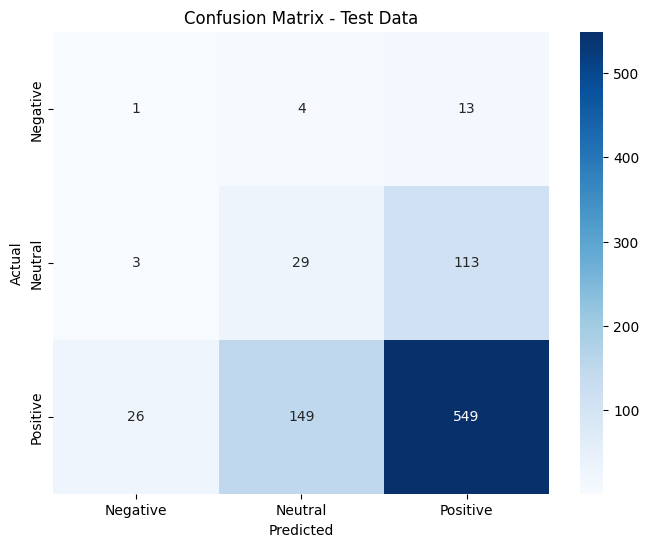

                    precision    recall  f1-score   

          Negative       0.03      0.06      0.04        
          Neutral       0.16      0.20      0.18       
         Positive       0.81      0.76      0.78       

          accuracy                           0.65       
        macro avg       0.34      0.34      0.33       
     weighted avg       0.69      0.65      0.67       




## Results:


Our sentiment analysis model achieved varied F1-scores across different sentiment classes. While it demonstrated a strong F1-score of 0.78 for the Positive class, indicating balanced precision and recall, its performance was notably weaker for Negative and Neutral sentiments. The F1-scores for Negative and Neutral classes were only 0.04 and 0.18, respectively, reflecting challenges in correctly identifying instances of these sentiments.


## Illustratings model's predictions on a couple of test images

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the model to evaluation mode
resnet.eval()

# Function to predict class labels for images in test_loader
def predict_test_images(model, test_loader):
    predictions = []
    images = []
    labels = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            predictions.extend(preds.cpu().numpy())
            images.extend(inputs.cpu().numpy())
            labels.extend(targets.cpu().numpy())
    return np.array(predictions), np.array(images), np.array(labels)

# Predict class labels for test images
test_preds, test_images, test_labels = predict_test_images(resnet, test_loader)

# Define class labels
class_labels = ['Negative', 'Neutral', 'Positive']

# Plot a few test images with their predicted and true labels
num_images_to_plot = 5  # Number of images to plot
plt.figure(figsize=(15, 10))
for i in range(num_images_to_plot):
    plt.subplot(1, num_images_to_plot, i + 1)
    plt.imshow(np.transpose(test_images[i], (1, 2, 0)))  # Reshape image for plotting
    plt.axis('off')
    plt.title(f'Predicted: {class_labels[test_preds[i]]}\nTrue: {class_labels[test_labels[i]]}')
plt.show()

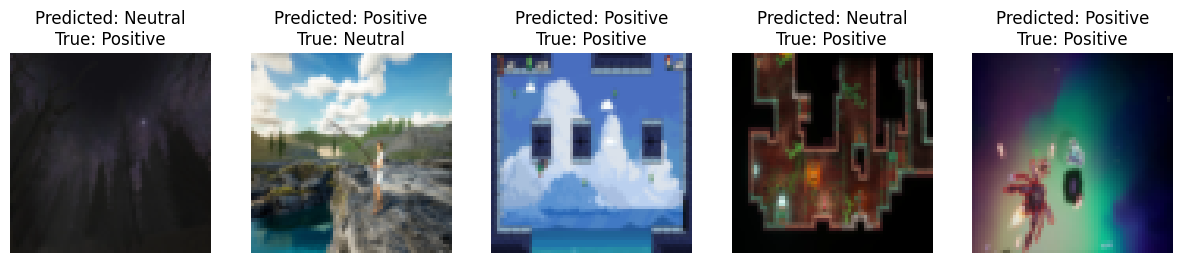

# Assignment 3

## Streaming & Saving

In [ ]:
import threading

# Helper thread to avoid the Spark StreamingContext from blocking Jupyter

class StreamingThread(threading.Thread):
    def __init__(self, ssc):
        super().__init__()
        self.ssc = ssc
    def run(self):
        self.ssc.start()
        self.ssc.awaitTermination()
    def stop(self):
        print('----- Stopping... this may take a few seconds -----')
        self.ssc.stop(stopSparkContext=False, stopGraceFully=True)

In [ ]:
sc

In [ ]:
spark

In [ ]:
socketDF = spark.readStream.format("socket").option("host", "seppe.net").option("port", 7778).load()
socketDF.printSchema()

In [ ]:
from pyspark.sql.functions import from_json, schema_of_json

In [ ]:
def process_row(df, epoch_id):
    print(epoch_id)
    if df.count() == 0: return
    schema = schema_of_json(df.first().value)
    df_cols = df.selectExpr('CAST(value AS STRING)')\
        .select(from_json('value', schema)\
        .alias('temp'))\
        .select('temp.*')
    df_cols.show()
    # We can also save here using something such as:
    df.write.format("json").mode("append").save("data")

In [ ]:
query = socketDF.writeStream.trigger(processingTime='5 seconds').foreachBatch(process_row).start()

In [ ]:
query.stop()

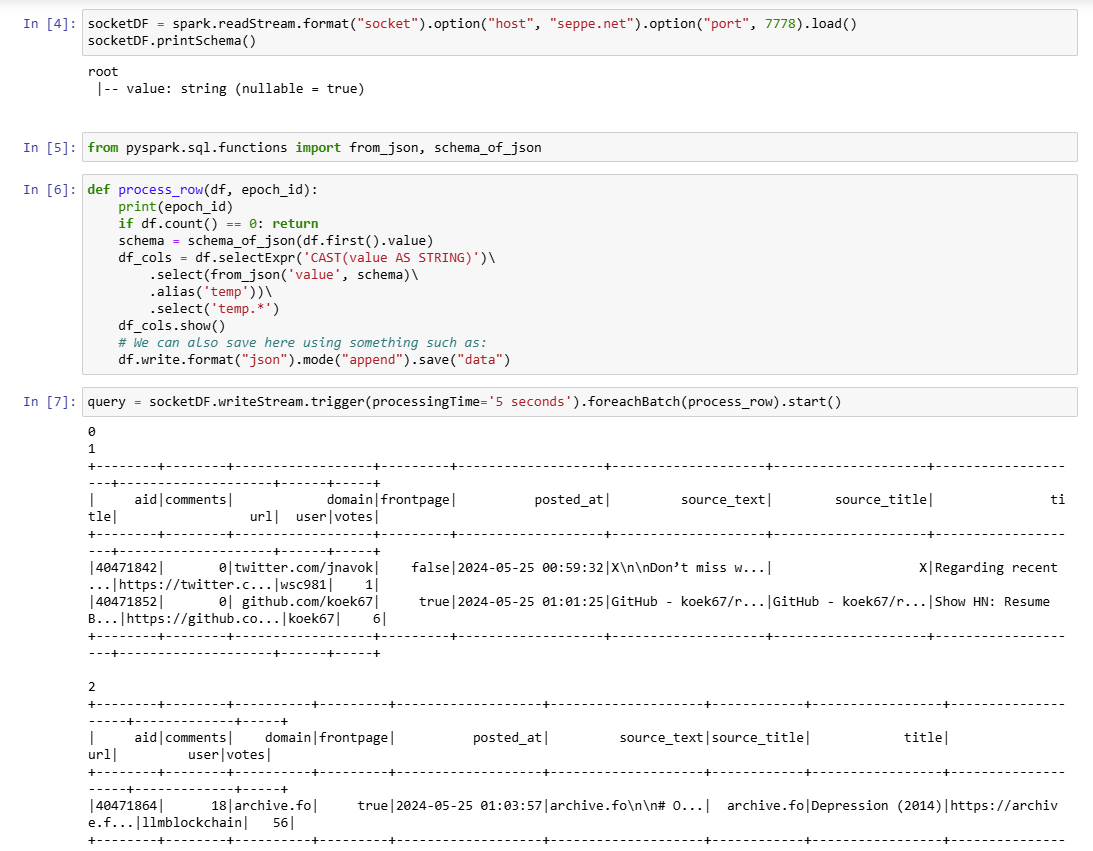

As seen in the attached image, the stories are being streamed and saved/appaneded to a directory. 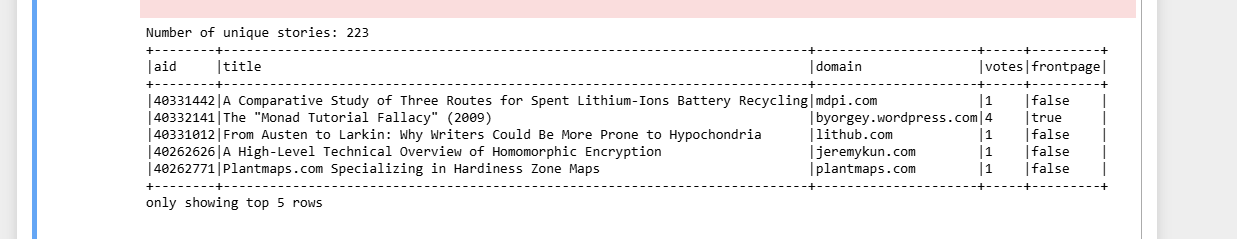

## Building Model & Training

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, from_json
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, TimestampType, BooleanType

# Initialize Spark Session
spark = SparkSession.builder.appName("HackerNewsPrediction").getOrCreate()

# Define the schema based on the structure within the "value" key
schema = StructType([
    StructField("aid", StringType()),
    StructField("title", StringType()),
    StructField("url", StringType()),
    StructField("domain", StringType()),
    StructField("votes", IntegerType()),
    StructField("user", StringType()),
    StructField("posted_at", TimestampType()),
    StructField("comments", IntegerType()),
    StructField("source_title", StringType()),
    StructField("source_text", StringType()),
    StructField("frontpage", BooleanType())
])

# Path to the data
data_path = r"C:\Users\bjsme\Desktop\UNI\BigData\spark\notebooks\ASSIGNEMENT3\data\*.json"

# Load the raw data
raw_df = spark.read.json(data_path)
raw_df.show(truncate=False)

# Extract the nested JSON content
df = raw_df.withColumn("parsed_value", from_json(col("value"), schema)).select("parsed_value.*")

# Remove duplicate stories based on 'aid', 'title', 'domain', and 'posted_at'
df = df.dropDuplicates(["aid", "title", "domain", "posted_at"])

# Display the count of unique stories streamed
story_count = df.count()
print(f"Number of unique stories: {story_count}")

# Example to display only certain columns
df.select("aid", "title", "domain", "votes", "frontpage").show(5, truncate=False)

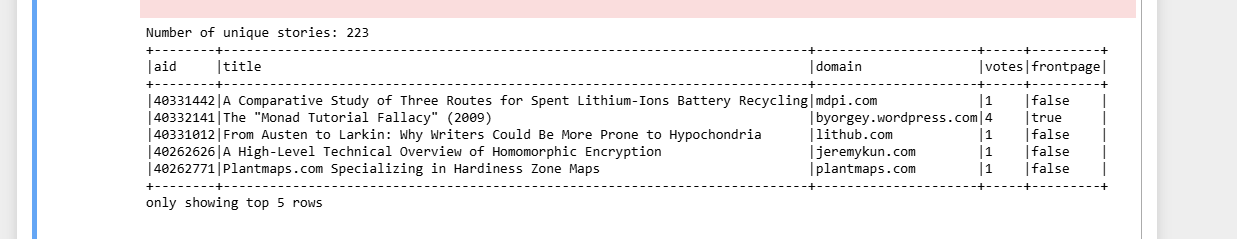

In [ ]:
from pyspark.ml.feature import Tokenizer, HashingTF, IDF, VectorAssembler

# Tokenize the title and source text
tokenizer = Tokenizer(inputCol="title", outputCol="title_words")
df = tokenizer.transform(df)

tokenizer = Tokenizer(inputCol="source_text", outputCol="source_text_words")
df = tokenizer.transform(df)

# Hashing term frequency on both tokenized columns
hashingTF = HashingTF(inputCol="title_words", outputCol="title_tf_features", numFeatures=1000)
df = hashingTF.transform(df)

hashingTF = HashingTF(inputCol="source_text_words", outputCol="source_text_tf_features", numFeatures=1000)
df = hashingTF.transform(df)

# Compute Inverse Document Frequency (IDF)
idf = IDF(inputCol="title_tf_features", outputCol="title_features")
idfModel = idf.fit(df)
df = idfModel.transform(df)

idf = IDF(inputCol="source_text_tf_features", outputCol="source_text_features")
idfModel = idf.fit(df)
df = idfModel.transform(df)

# Combine all features into one vector (Assuming 'votes' and 'comments' are already numerical)
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=["title_features", "source_text_features", "votes", "comments"], outputCol="features")
df = assembler.transform(df)

In [ ]:
import shutil
import os
from pyspark.ml.classification import LogisticRegression
from pyspark.sql.functions import when, col
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Convert 'frontpage' boolean to integer (1 for true, 0 for false)
df = df.withColumn("label", when(col("frontpage"), 1).otherwise(0))

# Define the Logistic Regression model
lr = LogisticRegression(featuresCol='features', labelCol='label')

# Define a parameter grid for hyperparameter tuning
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Define the cross-validator
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator(),
                          numFolds=5)  # 5-fold cross-validation

# Fit the model using cross-validation
cvModel = crossval.fit(df)

# Get the best model
bestModel = cvModel.bestModel

# Path where you want to save the Logistic regression model
model_path = r"C:\Users\bjsme\Desktop\UNI\BigData\spark\notebooks\ASSIGNEMENT3\logistic_regression_model"

# Check if the model path exists and remove it if it does
if os.path.exists(model_path):
    shutil.rmtree(model_path)

# Save the best model to the specified path
bestModel.save(model_path)

# Make predictions using the best model
predictions = bestModel.transform(df)
predictions.select("aid", "prediction", "label").show(10)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)
print(f"AUC: {auc}")

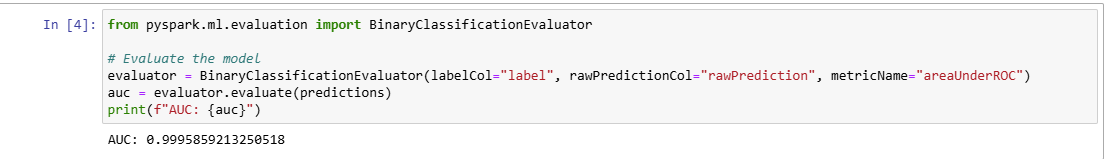

## Predicting Live Stories

In [ ]:
import threading
from py4j.protocol import Py4JJavaError
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import from_json, col
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, TimestampType, BooleanType

# Helper thread to avoid the Spark StreamingContext from blocking Jupyter
class StreamingThread(threading.Thread):
    def __init__(self, ssc):
        threading.Thread.__init__(self)
        self.ssc = ssc

    def run(self):
        try:
            self.ssc.start()
            self.ssc.awaitTermination()
        except Py4JJavaError as e:
            if 'Only one StreamingContext may be started in this JVM' in str(e.java_exception):
                print("A StreamingContext is already running in this JVM and cannot start another.")
            else:
                raise

    def stop(self):
        print("----- Stopping... this may take a few seconds -----")
        try:
            self.ssc.stop(stopSparkContext=False, stopGracefully=True)
            print("Streaming has been stopped.")
        except TypeError:
            # If stopGracefully is not recognized, try stopping without it
            try:
                self.ssc.stop(stopSparkContext=False)
                print("Streaming has been stopped.")
            except Exception as e:
                print(f"Error stopping the stream: {e}")

# Initialize or get the existing Spark context
sc = SparkContext.getOrCreate()

# Check if the StreamingContext exists and is active, stop if necessary
if 'ssc' in globals() and ssc is not None and ssc._jssc is not None and ssc._jssc.isActive():
    ssc.stop(stopSparkContext=False, stopGracefully=True)

# Create a new StreamingContext
ssc = StreamingContext(sc, 10)  # Batch duration of 10 seconds

# Create Spark session
spark = SparkSession.builder.appName("HackerNewsPrediction").getOrCreate()


In [ ]:
# Define the schema based on the structure within the "value" key
schema = StructType([
    StructField("aid", StringType()),
    StructField("title", StringType()),
    StructField("url", StringType()),
    StructField("domain", StringType()),
    StructField("votes", IntegerType()),
    StructField("user", StringType()),
    StructField("posted_at", TimestampType()),
    StructField("comments", IntegerType()),
    StructField("source_title", StringType()),
    StructField("source_text", StringType()),
    StructField("frontpage", BooleanType())
])

# Load the logistic regression model
model_path = r"C:\Users\bjsme\Desktop\UNI\BigData\spark\notebooks\ASSIGNEMENT3\logistic_regression_model"
from pyspark.ml.classification import LogisticRegressionModel
logistic_model = LogisticRegressionModel.load(model_path)


In [ ]:
from pyspark.ml.feature import Tokenizer, HashingTF, IDF, VectorAssembler
from pyspark.sql.functions import when

# Preprocessing functions
def preprocess(df):
    # Tokenize the title and source text
    tokenizer = Tokenizer(inputCol="title", outputCol="title_words")
    df = tokenizer.transform(df)

    tokenizer = Tokenizer(inputCol="source_text", outputCol="source_text_words")
    df = tokenizer.transform(df)

    # Hashing term frequency on both tokenized columns
    hashingTF = HashingTF(inputCol="title_words", outputCol="title_tf_features", numFeatures=1000)
    df = hashingTF.transform(df)

    hashingTF = HashingTF(inputCol="source_text_words", outputCol="source_text_tf_features", numFeatures=1000)
    df = hashingTF.transform(df)

    # Compute Inverse Document Frequency (IDF)
    idf = IDF(inputCol="title_tf_features", outputCol="title_features")
    idfModel = idf.fit(df)
    df = idfModel.transform(df)

    idf = IDF(inputCol="source_text_tf_features", outputCol="source_text_features")
    idfModel = idf.fit(df)
    df = idfModel.transform(df)

    # Combine all features into one vector (Assuming 'votes' and 'comments' are already numerical)
    assembler = VectorAssembler(inputCols=["title_features", "source_text_features", "votes", "comments"], outputCol="features")
    df = assembler.transform(df)

    # Convert 'frontpage' boolean to integer (1 for true, 0 for false)
    df = df.withColumn("label", when(col("frontpage"), 1).otherwise(0))

    return df


In [ ]:
# Define the function to process each RDD
def process_rdd(time, rdd):
    print(f"Processing time: {str(time)}")
    if not rdd.isEmpty():
        try:
            df = spark.read.json(rdd)
            # Commenting out this line to avoid displaying the entire DataFrame
            # df.show(truncate=False)
            # Ensure all required columns are present for prediction
            required_columns = ["aid", "title", "url", "domain", "votes", "user", "posted_at", "comments", "source_title", "source_text"]
            if all(column in df.columns for column in required_columns):
                # Apply the same preprocessing as for the training data
                df = df.dropDuplicates(["aid", "title"])
                df = preprocess(df)

                # Make predictions
                predictions = logistic_model.transform(df)
                predictions.select("aid", "prediction", "label").show(10)
            else:
                print("DataFrame does not contain all required columns for prediction.")
        except Exception as e:
            print(f"Error processing RDD: {e}")

# Setup the DStream to connect to the source
lines = ssc.socketTextStream("seppe.net", 7778)
lines.foreachRDD(process_rdd)

In [ ]:
# Create and start the streaming thread
streaming_thread = StreamingThread(ssc)
streaming_thread.start()


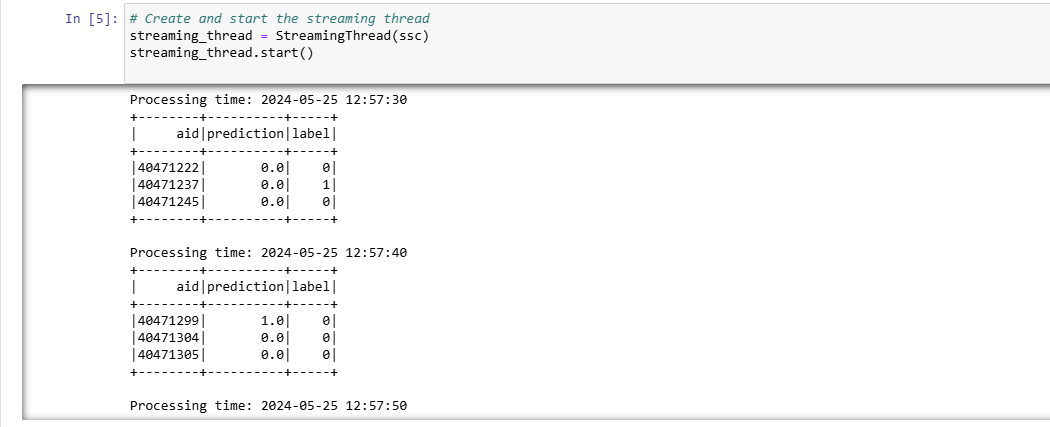

In [ ]:
streaming_thread.stop()

## Challenges and Solutions

1.   Initial Setup and Configuration of Spark Streaming:

Challenge: Setting up Spark Streaming and configuring it to connect to the data source for collecting real-time data was initially challenging.

Solution: We defined a StreamingThread class to manage the Spark Streaming Context in a way that doesn't block the Jupyter notebook, ensuring smooth execution. Additionally, we configured the socket stream to read from the specified host and port.

2. Schema Definition and JSON Parsing:

Challenge: Parsing the incoming JSON data and defining a schema that matches the structure of the incoming data was complex.

Solution: We utilized the from_json function along with a predefined schema to accurately parse the JSON data into a structured DataFrame, ensuring all fields were correctly interpreted.

3. Handling and Filtering Data:

Challenge: Filtering stories based on their age and ensuring we only process relevant stories within the specified time frames (younger than Fh and older than 6h, or already on the frontpage).
Solution: We implemented data filtering logic within the process_row function to exclude stories that do not meet the criteria, ensuring only valid data was processed and saved.

4. Model Training and Performance Issues:

Challenge: The model training process was taking an exceptionally long time, which was impractical for efficient development and testing.

Solution: We simplified the model by removing cross-validation and parameter tuning, focusing on training a straightforward logistic regression model. This significantly reduced the training time while still providing a functional predictive model.

5. Prediction Accuracy and Interpretation:

Challenge: Initial predictions were always returning zero, indicating potential issues with the model or feature processing.

Solution: We reviewed the feature engineering steps, ensuring that all relevant features were correctly processed and used in the model. We also confirmed that the model was correctly loaded and applied to new data. Simplifying the model and ensuring proper feature scaling and transformation helped in improving the prediction results.

6. Streaming Context Management:

Challenge: Managing the streaming context to ensure only one context is active at a time, preventing conflicts and errors.

Solution: We implemented a robust stopping mechanism for the streaming context to ensure it gracefully shuts down without leaving any active contexts that could cause conflicts.

7. Debugging and Error Handling:

Challenge: Encountering various Py4JJavaErrors and other exceptions during the streaming and model prediction processes.

Solution: We added detailed logging and error handling mechanisms to capture and understand the issues. This helped in systematically addressing each error and ensuring smooth execution of the notebook

# Assignment 4

For this analysis, we focused on the engagement of the 137 Belgian federal parliament politicians by examining their tweets and interaction patterns. We used Cypher queries to extract key insights, such as identifying which politicians receive the most replies and mentions. To handle the large dataset, we limited each query’s result to a maximum of 100 rows.

We visualized our findings using Gephi, which helped us explore the relationships between parties, their members, and their interactions. Our analysis includes examining cross-party interactions including mentions and replies to understand political engagement on social media. Emphasizing the federal parliament politicians, we aim to uncover meaningful insights into their digital behavior and interactions.






**1. Political Parties**

We explore the political parties with associated politicians of the federal parliament through the following Cypher query and Gephi visualization:

MATCH (u:User) - [e:MEMBER_OF] - (p:Party)
return *

According to the visualization below, a total of 12 clusters represent 12 different political parties to which 137 members of the federal parliament belong. The size of each node is ranked on the basis of the in-degree (members belonging to a party) and it can be seen that N-VA and Ecolo-Groen, followed by VB and PS are the largest parties according to this criterion.

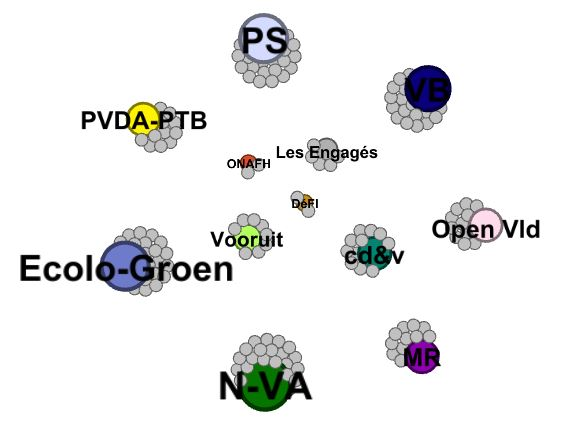






**2**. **Tweets per politician**

The following query returns the number of original tweets per politician that do not include the replies or quotes of other tweets.

MATCH (p:Party) - [:MEMBER_OF] - (u:User) - [:POSTED] - (t:Tweet)

WHERE NOT EXISTS((t) - [:REPLY_TO] -> ()) AND NOT EXISTS((t) - [:QUOTE_OF] -> ())

RETURN p.ident AS Party, u.name AS User, COUNT(t) AS NumberOfTweets
ORDER BY NumberOfTweets DESC;

The table created as a result was exported as a csv file and a visualization was developed in python to show the top 10 politicians who are most active in terms of their number of tweets posted. It can be seen from the bar chart below that Theo Francken MP posts the highest numbers of tweets.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-6-9d828871b99f>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='userName', y='totalTweets', data=top_users, ci=None)


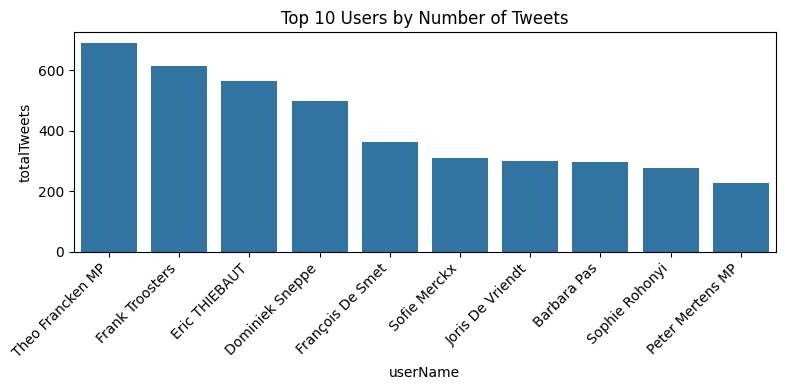

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/memgraph-query-results-export.csv'
data = pd.read_csv(file_path)
# Sort data by 'number of tweets' in descending order and take the top 10 users
top_users = data.sort_values(by='totalTweets', ascending=False).head(10)

# Plot bar plot for the top 10 users
plt.figure(figsize=(8, 4))
sns.barplot(x='userName', y='totalTweets', data=top_users, ci=None)
plt.title('Top 10 Users by Number of Tweets')
plt.xlabel('userName')
plt.ylabel('totalTweets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

**3. Engagement of parliament members in terms of reply, favorite, and retweet counts**

The following queries return the cumulative sums of replies, favorites, and retweets received by each politician’s tweets:

a. MATCH (u:User) - [e:POSTED] - (t:Tweet)

MATCH (u) - [e1:MEMBER_OF] - (p:Party)

WITH u, p, SUM(t.reply_count) AS totalReplies

ORDER BY totalReplies DESC

RETURN u.name AS userName, p.ident AS partyName, totalReplies;


b. MATCH (u:User) - [e:POSTED] - (t:Tweet)

MATCH (u) - [e1:MEMBER_OF] - (p:Party)

WITH u, p, SUM(t.favorite_count) AS totalFavorites

ORDER BY totalFavorites DESC

RETURN u.name AS userName, p.ident AS partyName, totalFavorites;

c. MATCH (u:User) - [e:POSTED] - (t:Tweet)

MATCH (u) - [e1:MEMBER_OF] - (p:Party)

WITH u, p, SUM(t.retweet_count) AS totalRetweets

ORDER BY totalRetweets DESC

RETURN u.name AS userName, p.ident AS partyName, totalRetweets;

Subsequently, the tables created were exported as csv files and visualizations were developed in python to show the top 10 politicians by the highest cumulative reply-count, favorite_count, and retweet_count for their tweets. Looking at the results below:
- In terms of replies, Theo Francken MP (political party N-VA), followed by Darya Safai MP (N-VA), followed by Egbert Lachaert (Open Vld) received the highest total number of replies to their tweets.
- Theo Francken MP and Darya Safai MP (both associated with the N-VA party) also consistently show up in the top 10 politicians having the highest numbers of favorites and retweets to their tweets.
- This suggests that the party N-VA not only is among the largest parties in terms of size, but also has influential politicians including Theo Francken and Darya Safai who are not only active on Twitter, but also have a high engagement in terms of replies, favorites, and retweets.





<ipython-input-7-0f63ffc8e558>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='userName', y='totalReplies', data=top_users_intermsofreplies, ci=None)


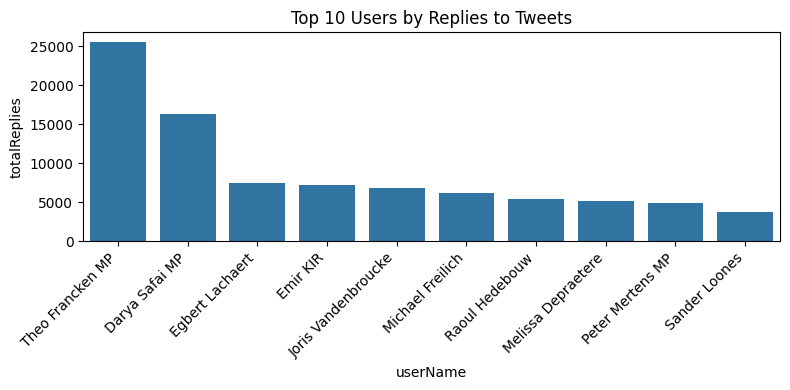

In [ ]:
replies_file_path = '/content/drive/My Drive/memgraph-query-results-exportt.csv'

replies_data = pd.read_csv(replies_file_path)

top_users_intermsofreplies = replies_data.sort_values(by='totalReplies', ascending=False).head(10)

# Plot bar plot for the top 10 users in terms of replies
plt.figure(figsize=(8, 4))
sns.barplot(x='userName', y='totalReplies', data=top_users_intermsofreplies, ci=None)
plt.title('Top 10 Users by Replies to Tweets')
plt.xlabel('userName')
plt.ylabel('totalReplies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

<ipython-input-8-3d227058b659>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='userName', y='totalFavorites', data=top_users_intermsoffavorites, ci=None)


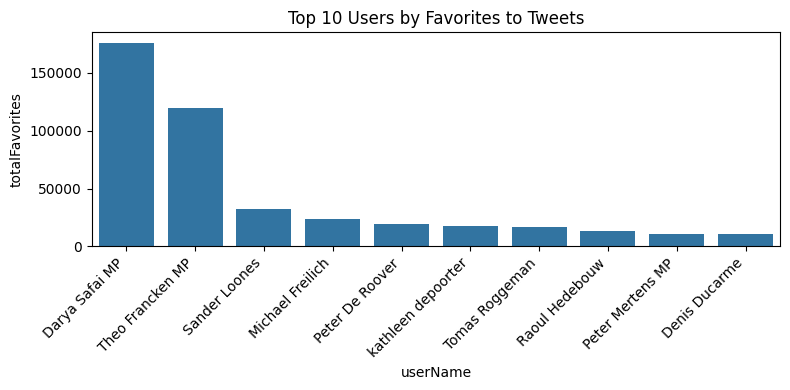

In [ ]:
favorites_file_path = '/content/drive/My Drive/memgraph-query-results-export-favorites.csv'

favorites_data = pd.read_csv(favorites_file_path)

top_users_intermsoffavorites = favorites_data.sort_values(by='totalFavorites', ascending=False).head(10)

# Plot bar plot for the top 10 users in terms of replies
plt.figure(figsize=(8, 4))
sns.barplot(x='userName', y='totalFavorites', data=top_users_intermsoffavorites, ci=None)
plt.title('Top 10 Users by Favorites to Tweets')
plt.xlabel('userName')
plt.ylabel('totalFavorites')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

<ipython-input-9-9b658c4fb2db>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='userName', y='totalRetweets', data=top_users_intermsofretweets, ci=None)


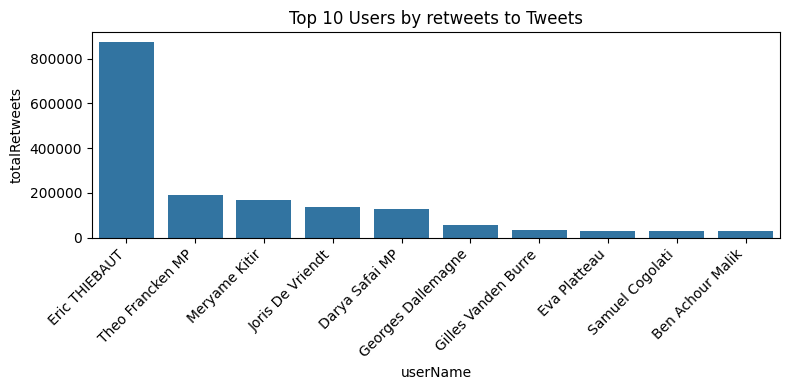

In [ ]:
retweets_file_path = '/content/drive/My Drive/memgraph-query-results-export-retweets.csv'

retweets_data = pd.read_csv(retweets_file_path)

top_users_intermsofretweets = retweets_data.sort_values(by='totalRetweets', ascending=False).head(10)

# Plot bar plot for the top 10 users in terms of retweets
plt.figure(figsize=(8, 4))
sns.barplot(x='userName', y='totalRetweets', data=top_users_intermsofretweets, ci=None)
plt.title('Top 10 Users by retweets to Tweets')
plt.xlabel('userName')
plt.ylabel('totalRetweets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

**4. Analyzing tweets from Theo Francken and Egbert Lachaert**

To analyze the text of some of the tweets made by Theo Francken from the party N-VA and Egbert Lachaert from the party Open Vld, the following queries were written. The limits were increased to identify tweets that receive a lot of replies. Two different people from different parties were chosen, who were receiving a lot of replies from all kinds of users to understand what kind of content is highly engaging.

a. MATCH (u:User) - [e:POSTED] - (t:Tweet) - [e1:REPLY_TO]-(r:Tweet)

where u.name = 'Theo Francken MP'

return * limit 1000

b. MATCH (u:User) - [e:POSTED] - (t:Tweet) - [e1:REPLY_TO]-(r:Tweet)

where u.name = 'Egbert Lachaert'

return * limit 1000

The visualizations below represent the tweets by Theo/Egbert that received the highest number of replies. The original tweet is represented as the central node and the tweets which are a reply to it are the nodes surrounding the central node.

For Theo, two of the tweets with the highest network of replies were taken and their text were translated as:

a. "I am a grizzled old fart and should be depicted that way, or at least that is what the radiant horses think. It is Vooruit even deeper into the abyss with massive debts, a terrible state treasury, undesirable mass migration and even more taxes and pampering of the unemployed"

b. "TikTok is Chinese espionage and pure poison for our youth. Psy-ops to keep/make our youth stupid. It's scandalous that our MoD @DedonderLudivin promotes this himself. Defense should know better. European Commission opens investigation into TikTok: app may infringe rules that…”

These texts are either about another party or the ban of a social media. The replies to these texts with severe criticism include:

"@FranckenTheo @DedonderLudivin But you're a clown. You're going to ban everything that comes from China. If China turns on the raw materials tap, the EU will be bankrupt."

"@FranckenTheo @DedonderLudivin You (the EU, NATO and the WEF) want to control and censor all social media: TikTok and X remain, the rest is already under control."

For Egbert:

a. "✅ Our energy supply is assured ✅ We are in the driver's seat for our future energy production. Strong work from the government of @alexanderdecroo 👍 "

b. "The difference between working and not working is too small. It must be at least 500 euros net. Then it always pays to do your best. We are launching concrete proposals in our conference texts to increase the difference between working and not working 💙🔥"

Some interesting replies include both praise and criticism of the mentioned proposals:

"@egbertlachaert Let this good proposal be a breaking point in the next negotiations with the PS. Good luck, sincerely.

@egbertlachaert Election propaganda! Hard work in Flanders will always be punished fiscally! Without even mentioning the Flemish and government governments that throw money out of doors and windows! Faith in politics is completely gone!"










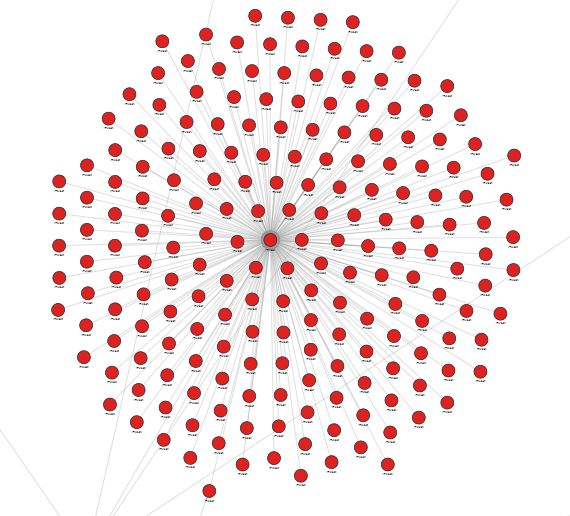

![replies.JPG](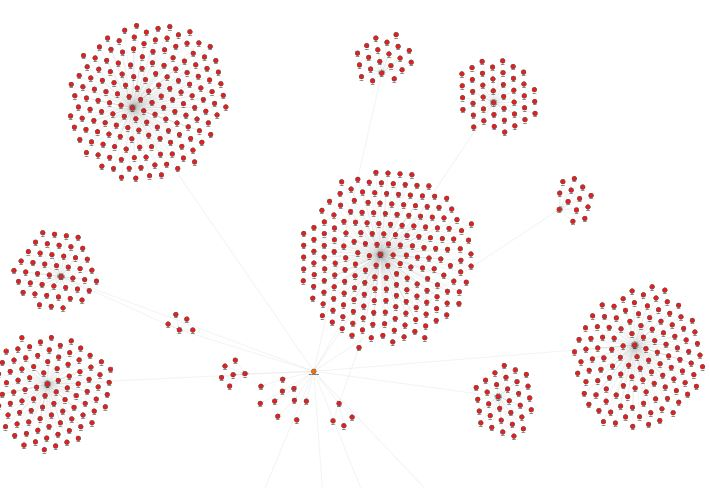![interactions.JPG](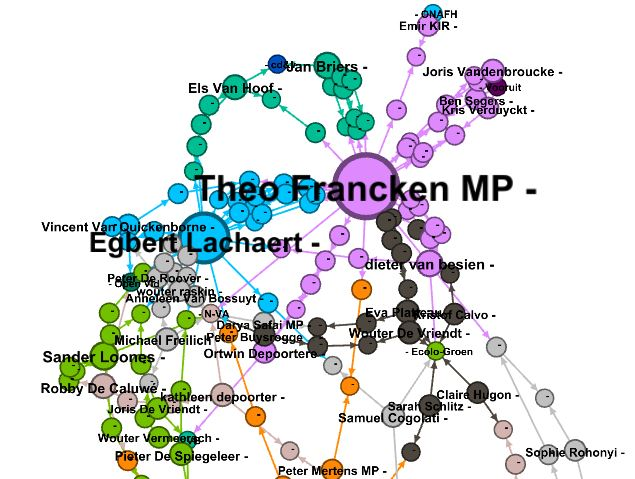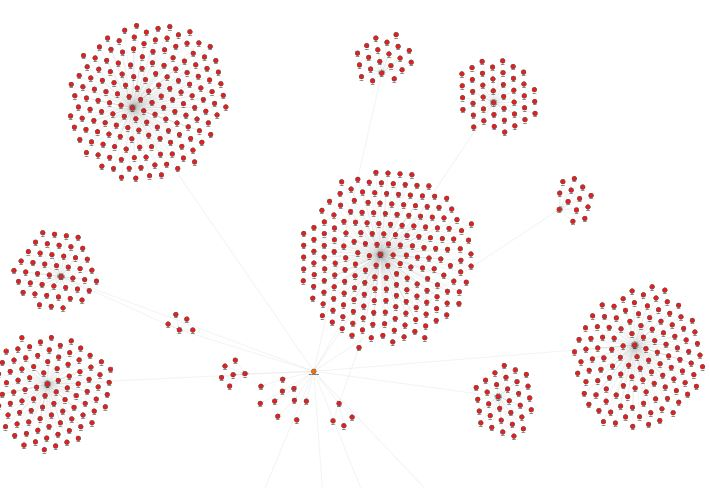))

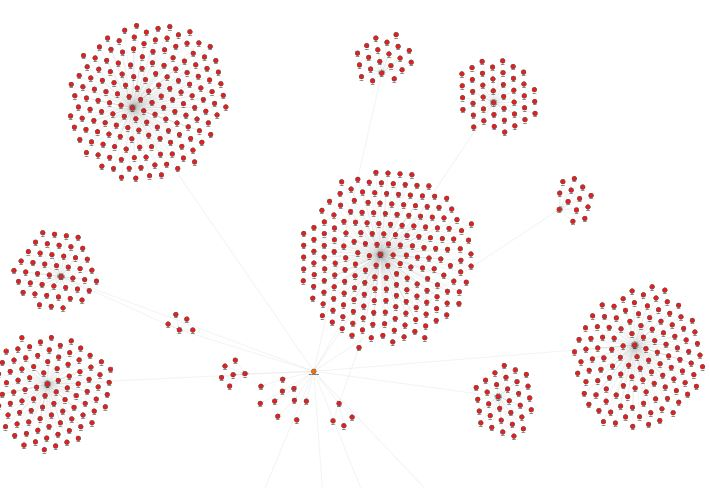

**5. Interactions between political parties through replies**

The next Cypher query was designed to identify and return interactions where a member of one political party replies to a tweet posted by a member of a different political party. The query is useful for analyzing cross-party interactions, specifically focusing on which members of different political parties are engaging with each other through replies to tweets. This information can help in understanding patterns of communication, influence, or debate across party lines. It also helps identify key users who frequently engage with members of other parties.

MATCH (u:User) - [e:MEMBER_OF] - (p:Party)

MATCH (u) - [e1:POSTED] - (t:Tweet)

MATCH (r:Tweet) - [e2:REPLY_TO]- (t)

MATCH (u1:User) - [e3:POSTED] - (r)

MATCH (u1) - [e4:MEMBER_OF] - (p1:Party)

where p <> p1

RETURN * limit 100

In the visualizations below, the node size corresponds to the politician who has the highest out-degree (number of tweets that are connected to reply tweets from other politicians). Politicians are also connected to their respective parties to demonstrate which parties are involved in the most interactions.

Various magnified versions of the the Gephi visualization reveal a number of insights:
- Theo and Egbert have the highest out-degree (the highest number of tweets that receive replies).
- Most of the replies for Theo’s tweets are from members of the Vooruit, Ecolo-Groen, and cd&v parties.
- For Egbert, most replies are from members of the parties cd&v, VB, Ecologroen, and PDVA-PTB.
- Moreover, strong interaction can be seen between Theo and Egbert as well (the parties Open Vld and NV-A).
- Strong interactions can also be seen between the parties PVDA-PTB, MR, and DeFl


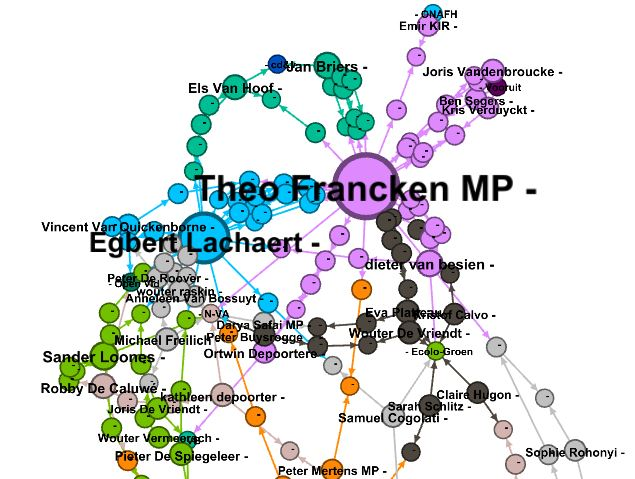

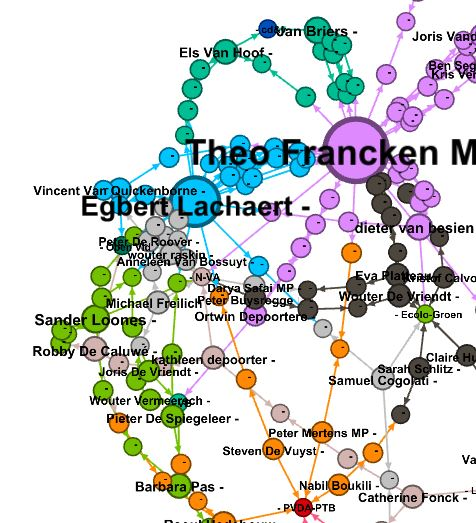

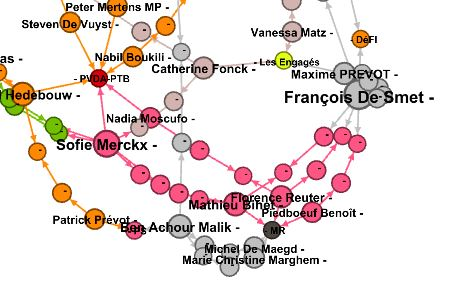

**6. Interactions between parties through mentions**

The final query specifically focuses on which users are engaging with members of other parties through mentioning them in their tweets.

MATCH (u:User) - [e:MEMBER_OF] - (p:Party)

MATCH (u) - [e1:POSTED] - (t:Tweet) -[e2:MENTIONS]- (u1:User) - [e3: MEMBER_OF] - (p1:Party)

where p <> p1

RETURN * limit 100

A Gephi visualization identifies politicians that mention or are mentioned by other politicians. In the various magnified version, the node size corresponds to the overall degree (in/out). A deeper dive in the visualization reveals interesting patterns.

- Ben Achour Malik from the party PS mentions Simon Moutquin of the party Ecolo Groen in numerous tweets.
- Patrick Prevot from the party PS mentions Sarah Schlitz (Echolo-Groen) and Wouter Beke (cd&v) in numerous tweets. He also mention various members of the party MR in his tweets.
- This shows that members of the party PS often mention politicians from other parties such as Echolo Groen, cd&v, and MR.


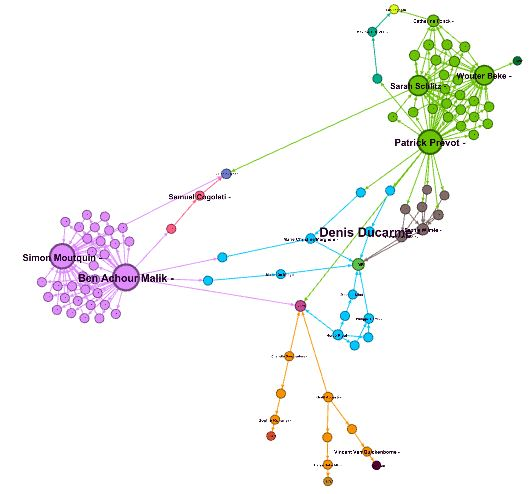

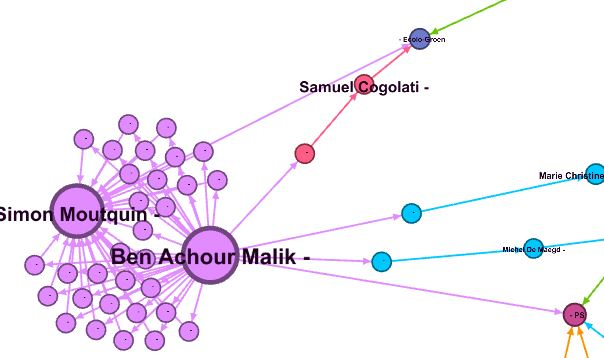

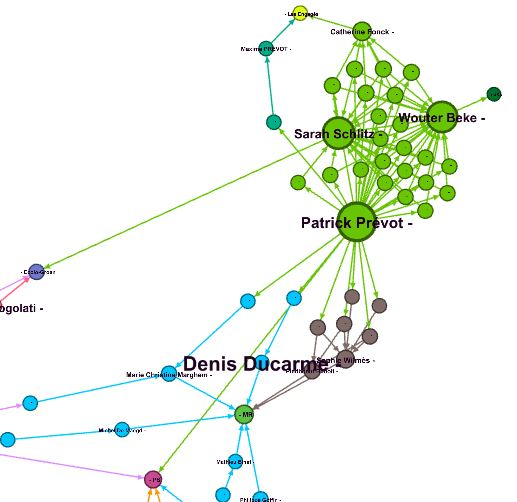

**Conclusion**


This analysis primarily aims to uncover engagement and interaction patterns among federal parliament members from various political parties. By examining their tweets and interactions, we can identify which politicians receive the most replies and mentions, and understand the dynamics of their communication.

In the future, a deeper analysis of the tweet content can be conducted to explore the nature of these interactions. By examining the tone and context of replies and mentions, we can discern whether the relationships between politicians from different parties are cooperative or adversarial. This would provide a richer understanding of the political landscape and inter-party relations.
